# АНАЛИЗ БИЗНЕС-ПОКАЗАТЕЛЕЙ

## Описание проекта

Цель проекта:

* помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет

Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:

- лог сервера с данными о посещениях сайта Яндекс.Афиши,

- выгрузка всех заказов за этот период,

- статистика рекламных расходов.

Нам предстоит изучить:

как клиенты пользуются сервисом,

когда делают первые покупки на сайте,

сколько денег приносит компании каждый клиент,

когда расходы на привлечение клиента окупаются.


[Выручка измеряется в условных единицах — у.е.]

## Загрузка данных и подготовка их к анализу

Выгрузка датасетов, проверка их на пропуски и замена типов данных

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

visits = pd.read_csv('/datasets/visits_log.csv')
visits.head()
visits.columns = visits.columns.str.lower().str.replace(' ','_')

visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [2]:
orders = pd.read_csv('/datasets/orders_log.csv')
orders.head()
orders.columns = orders.columns.str.lower().str.replace(' ','_')
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [3]:
costs = pd.read_csv('/datasets/costs.csv')
costs.columns = costs.columns.str.lower().str.replace(' ','_')
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Датасаты приведены в порядок и подготовлены для определения метрик. Столбцы со временем переведены в тип данных для дальнейшего составления метрик. Пропусков нет, данные готовы.

## Рассчитайте метрики и постройте графики

#### DAU WAU MAU 

In [4]:
visits['day'] = visits['start_ts'].dt.date
visits['week'] = visits['start_ts'].dt.week
visits['year'] = visits['start_ts'].dt.year
visits['month'] = visits['start_ts'].dt.month
visits.head()

,device,end_ts,source_id,start_ts,uid,day,week,year,month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017,12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018,2
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017,7
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018,5
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,2017,12


In [5]:
# рассчёт среднего значения метрик DAU, WAU и MAU
dau = visits.groupby('day').agg({'uid': 'nunique'}).mean()
wau = (visits.groupby(['year', 'week'])
    .agg({'uid': 'nunique'})).mean()
mau = (visits.groupby(['year', 'month'])
    .agg({'uid': 'nunique'})).mean()
display(dau, wau, mau)

uid    907.991758
dtype: float64

uid    5716.245283
dtype: float64

uid    23228.416667
dtype: float64

In [6]:
dau_total = visits.groupby('day').agg({'uid': 'nunique'})
wau_total = (visits.groupby(['year', 'week'])
    .agg({'uid': 'nunique'}))
mau_total = (visits.groupby(['year', 'month'])
    .agg({'uid': 'nunique'}))

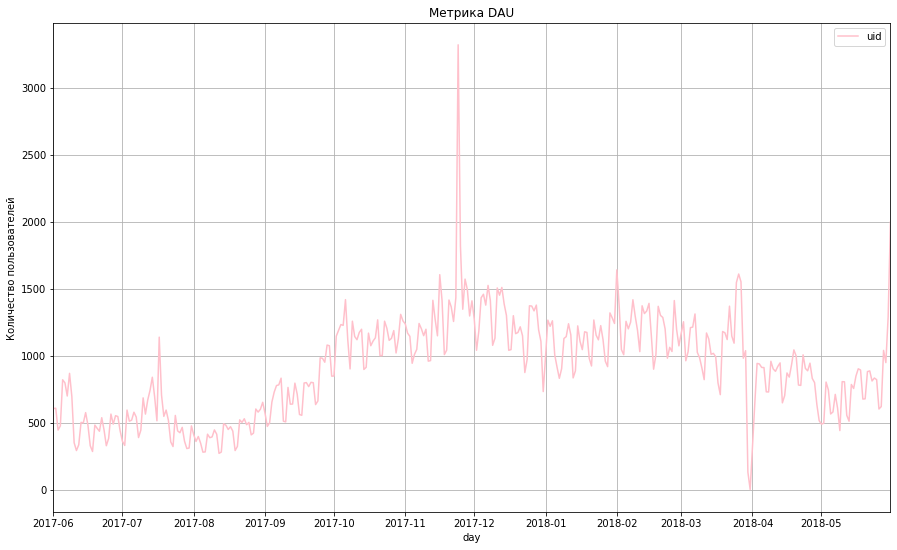

In [7]:
dau_total.plot(figsize=(15, 9), grid=True, color='pink')
plt.title('Метрика DAU')
plt.ylabel('Количество пользователей')
plt.show()

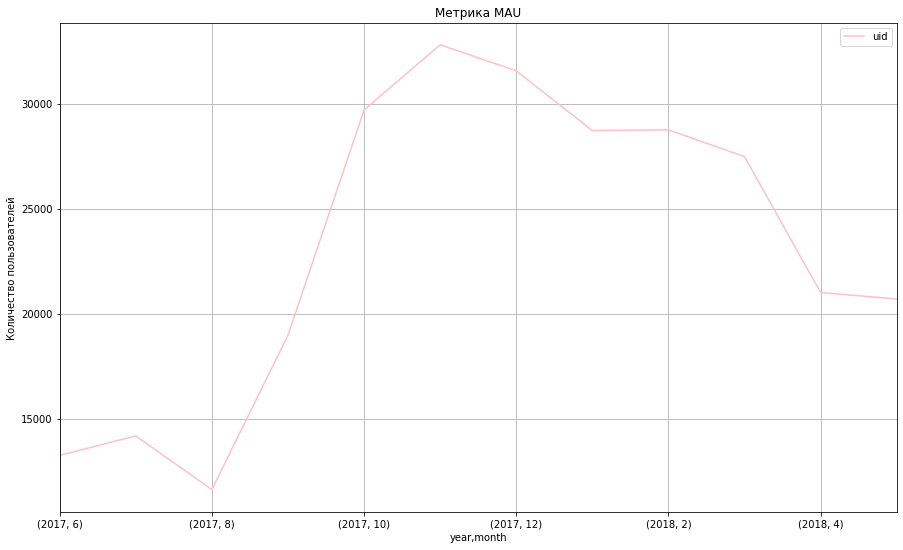

In [8]:
mau_total.plot(figsize=(15, 9), grid=True, color='pink')
plt.title('Метрика MAU')
plt.ylabel('Количество пользователей')
plt.show()

Text(0.5, 0, 'Неделя')

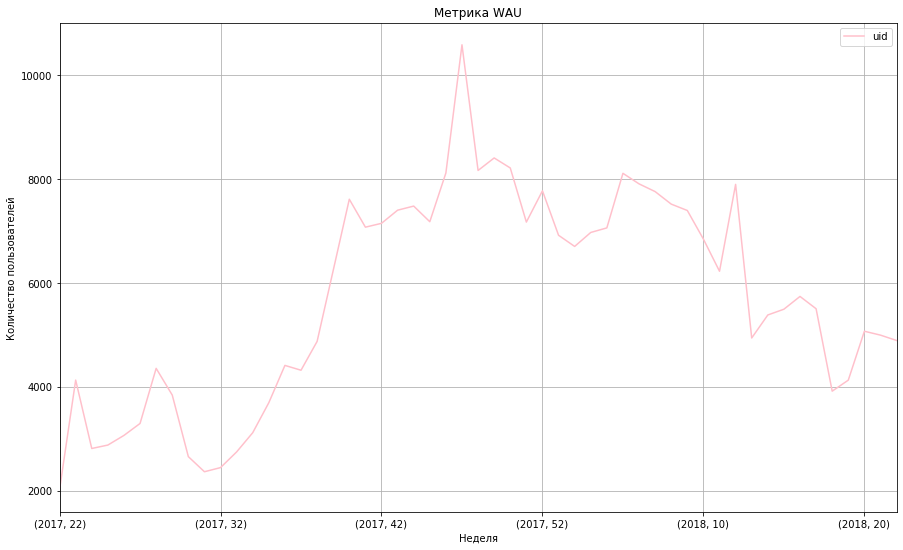

In [9]:
wau_total.plot(figsize=(15, 9), grid=True, color='pink');
plt.title('Метрика WAU')
plt.ylabel('Количество пользователей')
plt.xlabel('Неделя')

Вывод по метрикам DAU, WAU, MAU:
На графике дневных заходов уникальных пользователей виден один высокий всплеск в 20-х числах ноября 2017 года. Учитывая, что мы анализируем данные яндекс.афиши, можно предположить, что либо в Россию приезжала выступать группа всемирно и всеми любимая, либо самый ожидаемый фильм года, поэтому было очень много посещений. Ещё можно предположить, что в этот период маркетинг вдарил по всем возможным ресурсам распространения рекламы и поэтому количество переходов в ноябре достигло пика. Также на графике видно, что в конце марта 2018 года  статистика посещений резко просела, это можно списать на техническую неполадку на сайте.
Если смотреть на график понедельного отчёта об активности пользователей, то можно в годовом срезе заметить достаточно резкое увеличение новых посещений на сайте, начиная с 32 недели, достижение пика активности примерно в то же время, что и пик активности на графике дневных посещений и затем плавное снижение.
На графике месячного отчёта активност пользователей можно увидеть понедельный отчёт в более плавном режиме. С августа 2017 по ноябрь сильный рост и после плавное снижение активности. 

#### Определим сколько раз за день пользователи в среднем заходят на сайт

Text(0, 0.5, 'Количество заходов в день')

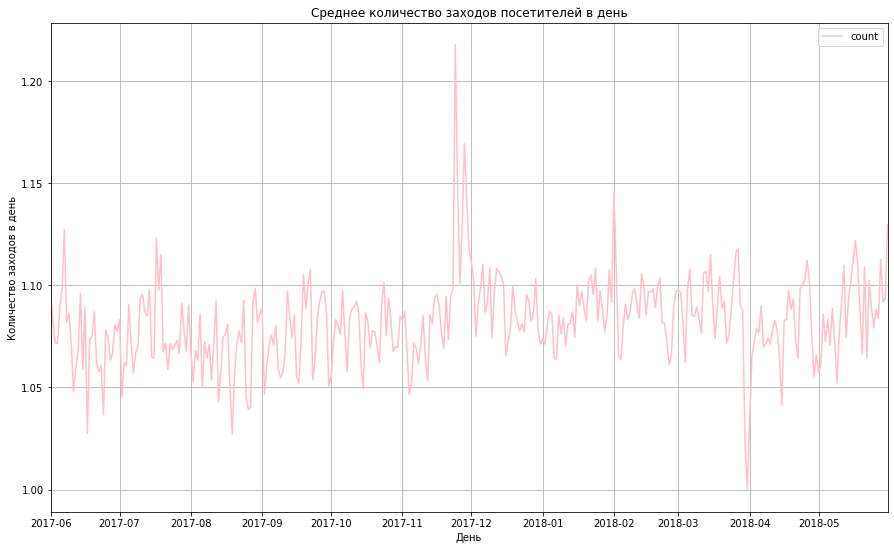

In [10]:

daily = visits.groupby(['day', 'uid']).agg({'uid':'count'})
daily.columns = ['count']
daily = daily.reset_index()
daily = daily.groupby('day').agg({'count':'mean'})
daily.plot(figsize=(15,9), grid=True, color='pink');
plt.title('Среднее количество заходов посетителей в день')
plt.xlabel('День')
plt.ylabel('Количество заходов в день')

#### Исследуем сколько времени пользователи проводят на сайте и узнаем продолжительность типичной пользовательской сессии за весь период

Text(0, 0.5, 'Количество посещений')

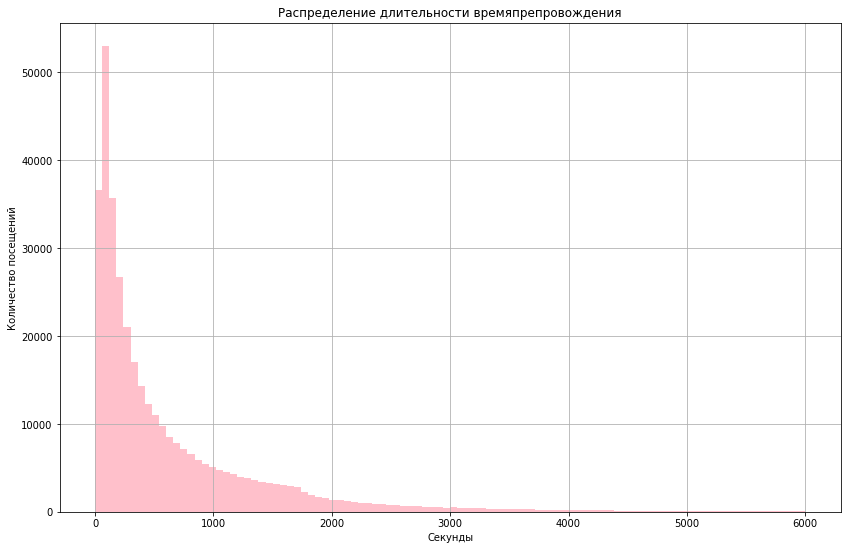

In [11]:
# подсчёт длительности времяпрепровождения пользователей на сайте
visits['duration'] = (visits['end_ts']-visits['start_ts']).dt.seconds
visits['duration'].hist(range=(0,6000), bins=100, figsize=(14, 9), color='pink');
plt.title('Распределение длительности времяпрепровождения')
plt.xlabel('Секунды')
plt.ylabel('Количество посещений')

In [12]:
visits['duration'].mode()

0    60
dtype: int64

Распределение нормальное, самая часто повторяющаяся длительность времяпрепровождения на сайте 60 секунд. Видимо, пользователи заранее знают на что хотят купить билеты и заходят на сайт только сделть покупку. Или можно сказать, что посетителям достаточно 60 секунд, чтобы принять решение.

#### Рассчитаем Retention Rate(коэффициент удержания), применяя когортный анализ

In [13]:
# найдём первый месяц покупки
first_activity_date = orders.groupby(['uid'])['buy_ts'].min()
first_activity_date.name = 'first_activity_date'
orders = orders.join(first_activity_date,on='uid')
orders.head()

,buy_ts,revenue,uid,first_activity_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


In [14]:
#приведём два столбца с датами в нужный тип даты
orders['first_order_month'] = orders['first_activity_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders.head()

,buy_ts,revenue,uid,first_activity_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [15]:
# найдём срок между моментом покупки и первом месяцем 
orders['lifetime'] = orders['order_month'] - orders['first_order_month']
orders['lifetime'] = orders['lifetime'] / np.timedelta64(1, 'M')
orders['lifetime'] = orders['lifetime'].round().astype('int') 
orders.head()

,buy_ts,revenue,uid,first_activity_date,first_order_month,order_month,lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0


In [16]:
#Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»:
cohorts = orders.groupby(['first_order_month','lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts.head()

,first_order_month,lifetime,uid
0,2017-06-01,0,2023
1,2017-06-01,1,61
2,2017-06-01,2,50
3,2017-06-01,3,54
4,2017-06-01,4,88


In [17]:
# Найдём исходное количество пользователей в когорте. Возьмём их число на нулевой месяц:
initial_users_count = cohorts[cohorts['lifetime'] == 0][['first_order_month', 'uid']]
initial_users_count

,first_order_month,uid
0,2017-06-01,2023
12,2017-07-01,1923
23,2017-08-01,1370
33,2017-09-01,2581
42,2017-10-01,4340
50,2017-11-01,4081
57,2017-12-01,4383
63,2018-01-01,3373
68,2018-02-01,3651
72,2018-03-01,3533


In [18]:
# Переименуем столбец uid в cohort_users методом rename()
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
initial_users_count

,first_order_month,cohort_users
0,2017-06-01,2023
12,2017-07-01,1923
23,2017-08-01,1370
33,2017-09-01,2581
42,2017-10-01,4340
50,2017-11-01,4081
57,2017-12-01,4383
63,2018-01-01,3373
68,2018-02-01,3651
72,2018-03-01,3533


In [19]:
#Объединим данные по когортам с исходным количеством пользователей в когорте:
cohorts = cohorts.merge(initial_users_count,on='first_order_month') 
cohorts.head()

,first_order_month,lifetime,uid,cohort_users
0,2017-06-01,0,2023,2023
1,2017-06-01,1,61,2023
2,2017-06-01,2,50,2023
3,2017-06-01,3,54,2023
4,2017-06-01,4,88,2023


In [20]:
#рассчитаем Retention Rate
#Разделим кол-во активных пользователей в каждый месяц на исходное число пользователей в когорте
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
cohorts.head()

,first_order_month,lifetime,uid,cohort_users,retention
0,2017-06-01,0,2023,2023,1.000000
1,2017-06-01,1,61,2023,0.030153
2,2017-06-01,2,50,2023,0.024716
3,2017-06-01,3,54,2023,0.026693
4,2017-06-01,4,88,2023,0.043500


lifetime
0     1.000000
1     1.036998
2     1.064661
3     1.090912
4     1.117959
5     1.143277
6     1.170525
7     1.194395
8     1.222413
9     1.242223
10    1.253114
11    1.311419
dtype: float64

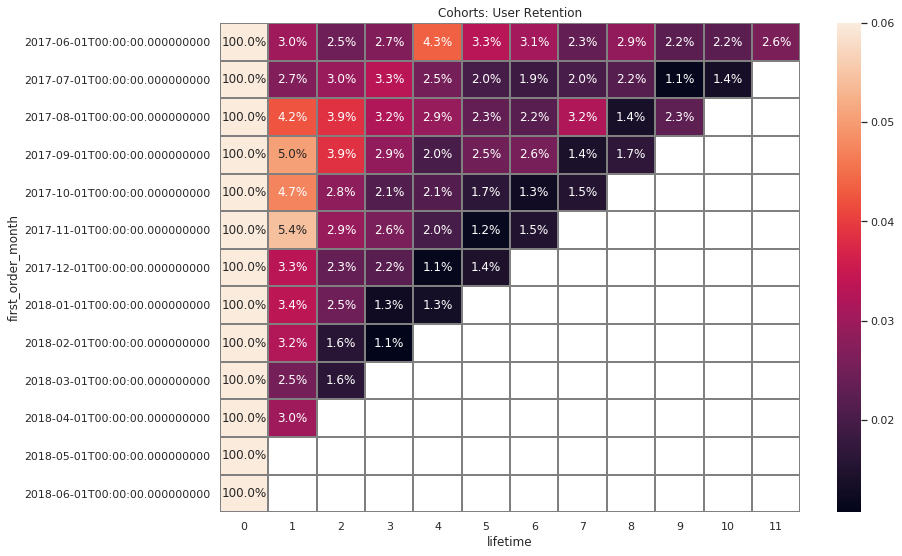

In [21]:
#Построим сводную таблицу и создадим тепловую карту:
retention_pivot = cohorts.pivot_table(
    index='first_order_month',
    columns='lifetime',
    values='retention',
    aggfunc='sum',
) 
display(retention_pivot.cumsum(axis=1).mean(axis=0))
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.06); 

Говоря про удержание клиентов, то когорты августа и сентября наиболее оптимистично выглядят, те люди, что привлеклись в этих месяцах, продолжали возвращаться гораздо чаще, чем в остальных когортах, можно взять их модель привлечения клиентов за основу. Изучить характеристику среднего покупателя в этих когортах, способы привлечения и вкладывания средств в рекламу и на этой базе выстроить портрет клиента, который возвращается чаще за покупкой билетов.

In [22]:
# Найдём средний Retention Rate на второй месяц «жизни» когорт:
retention_of_2 = cohorts.query('lifetime == 2')
display(retention_of_2['uid'].sum()/retention_of_2['cohort_users'].sum())

0.02575340712777529

### Метрики электронной коммерции

#### Исследуем сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки

In [23]:
# добавим столбец с разницей между первым посещением и совершением покупки
first_visit = visits.pivot_table(index='uid',values='start_ts', aggfunc='min').reset_index()
first_order = orders.pivot_table(index='uid',values='buy_ts', aggfunc='min').reset_index()
duration_to_order = first_visit.merge(first_order, on='uid', how='left')
duration_to_order = duration_to_order.dropna()
duration_to_order['duration'] = duration_to_order['buy_ts']-duration_to_order['start_ts']
duration_to_order['duration'] = duration_to_order['duration'].astype('timedelta64[h]')
duration_to_order['duration'] = duration_to_order['duration'].round().astype('int') 
duration_to_order.head()

,uid,start_ts,buy_ts,duration
3,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,2567
22,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
35,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,1
36,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,19
38,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0


Text(0, 0.5, 'Количество совершённых сессий')

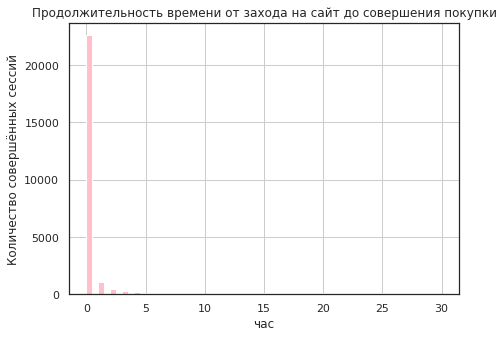

In [61]:
duration_to_order['duration'].hist(bins=60, figsize=(7,5), range=(0, 30), color='pink');
plt.title('Продолжительность времени от захода на сайт до совершения покупки')
plt.xlabel('час')
plt.ylabel('Количество совершённых сессий')

In [47]:
#найдём среднее значение столбца
mean_duration = duration_to_order.query('duration > 0')
mean_duration['duration'].mode()

0    1
dtype: int64

вывод доовльно тривиален, после захода на сайт люди в течение часа совершают покупку, за это время в среднем они принимают решение.

#### рассчитаем среднее количество покупок на одного покупателя за год

In [52]:
cohorts_order = (orders.pivot_table(index=['first_order_month', 'lifetime'], 
                                    values='uid', aggfunc=('nunique','count')).reset_index())
cohorts_order['mean'] = cohorts_order['count'] / cohorts_order['nunique']
cohorts_order.head()

,first_order_month,lifetime,count,nunique,mean
0,2017-06-01,0,2354,2023,1.163618
1,2017-06-01,1,177,61,2.901639
2,2017-06-01,2,174,50,3.480000
3,2017-06-01,3,226,54,4.185185
4,2017-06-01,4,292,88,3.318182


In [53]:
cohorts_order_pivot=(cohorts_order.pivot_table(index='first_order_month',
                                               columns='lifetime', values='mean'))
cohorts_order_pivot.cumsum(axis=1).round(2)

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,4.07,7.55,11.73,15.05,18.30,22.75,26.46,30.11,33.51,35.64,37.27
2017-07-01,1.14,3.06,5.17,6.79,8.26,10.42,12.11,13.39,14.77,15.87,17.90,NaN
2017-08-01,1.12,2.98,4.87,6.71,8.83,10.77,12.40,14.18,16.60,18.08,NaN,NaN
2017-09-01,1.14,2.82,4.43,6.65,7.94,9.64,11.28,12.79,14.21,NaN,NaN,NaN
2017-10-01,1.14,2.67,3.99,5.31,6.70,8.13,9.66,11.53,NaN,NaN,NaN,NaN
2017-11-01,1.18,2.97,4.48,6.47,8.15,9.38,11.03,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.15,3.00,4.96,6.81,8.53,10.20,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.12,3.09,5.00,6.49,8.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.12,3.00,4.43,6.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
print('Среднее количество покупок на одного покупателя:', cohorts_order_pivot[6].mean())

Среднее количество покупок на одного покупателя: 2.099438315567348


In [57]:
pivot = orders.pivot_table(index='uid', values='revenue', aggfunc='count').reset_index()
pivot.head()

,uid,revenue
0,313578113262317,1
1,1575281904278712,2
2,2429014661409475,1
3,2464366381792757,1
4,2551852515556206,2


In [58]:
pivot['revenue'].mean()

1.3803630588943954

1,4 покупка на пользователя в целом по проекту, включая тех пользователей, который купили один раз и исчезли
а по когортам, где люди возвращались и совершали повторные покупки, в среднем на шестой месяц один пользователь совершает 2 покупки

#### рассчёт среднего чека

Text(0, 0.5, 'Условные единицы')

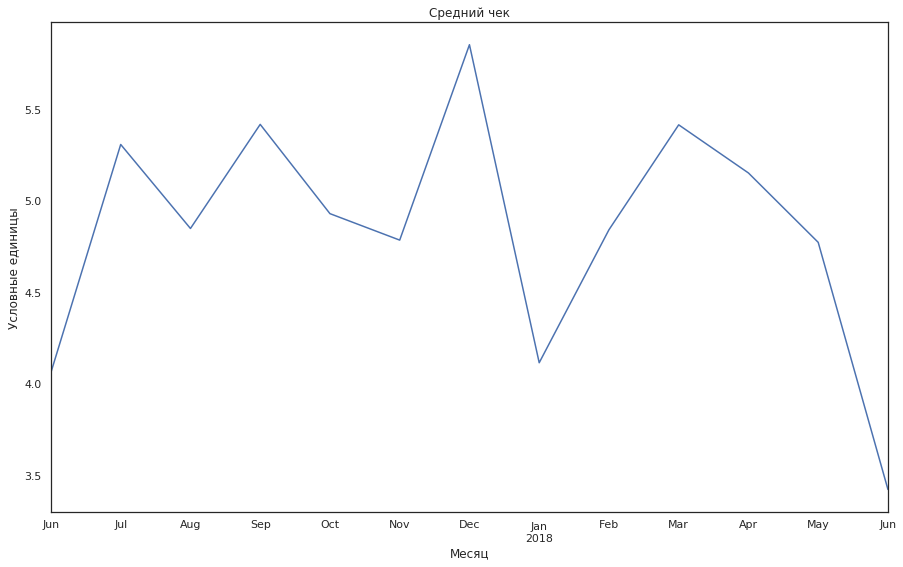

In [29]:
revenue = orders.pivot_table(index='order_month', values='revenue', aggfunc=('count','sum'))
revenue['aov'] = revenue['sum']/revenue['count']
revenue.head(10)
revenue['aov'].plot(figsize=(15,9));
plt.title('Средний чек')
plt.xlabel('Месяц')
plt.ylabel('Условные единицы')


In [41]:
print('Величина среднего чека за весь период: ', revenue['aov'].mean())

Величина среднего чека за весь период:  4.838699619166338


Сезонность наблюдается в таком порядке: между июлем и сентябрём наблюдается небольшой спад, в августе инетерес к покупкам билетов снижается; в ноябре наблюдается резкий подъём в конуе месяца, что связано, корее всего, в "чёрной пятницей" (спасибо за подсказку:) ) и резкий спад в в начале января, что можно связать с новогодними праздниками и пониженным фокусом внимания к мероприятиям, заставляющим выходить из дома.

#### LTV

In [30]:
cohorts_ltv = (
    orders.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts_ltv.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [31]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [32]:
report = pd.merge(cohort_sizes, cohorts_ltv, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


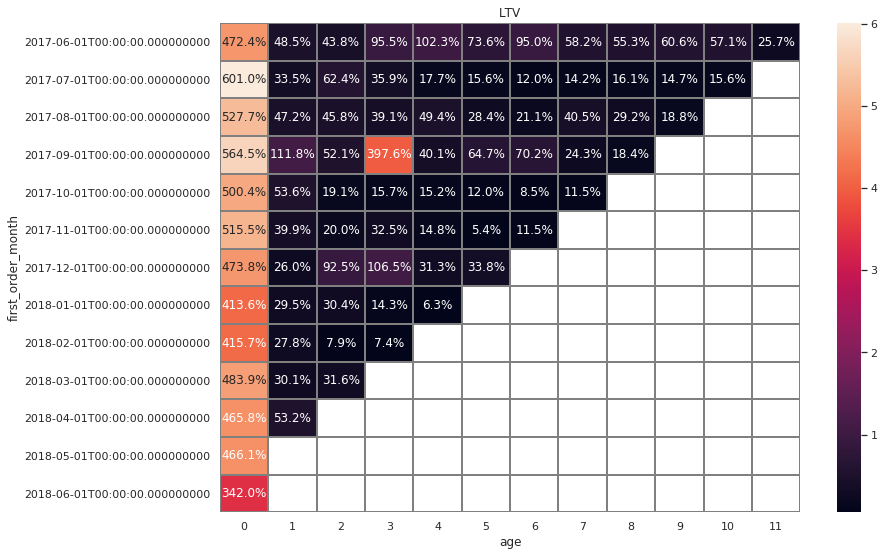

In [33]:
margin_rate = 1

report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] =  report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)
display(output.cumsum(axis=1))
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(output, annot=True, fmt='.1f', linewidths=1, linecolor='gray'); 



Самые перспективные когорты за изучаемый срез по году оказались июньская и сентябрьская. 
Самые не перспективные те, что не менялись на протяжении всего периода, то есть августовская, ноябрьская, январская, февральская и мартовская.

## Маркетинговые метрики

#### Посчитаем общую сумму расходов на маркетинг

In [34]:
print('Общая сумма расходов на маркетинг: ', costs['costs'].sum())

Общая сумма расходов на маркетинг:  329131.62


#### CAC

In [35]:
#выясним как траты распределены по источникам
cost_pivot=costs.pivot_table(index='source_id', values='costs', aggfunc='sum').reset_index()
cost_pivot

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


Text(0, 0.5, 'Условные единицы')

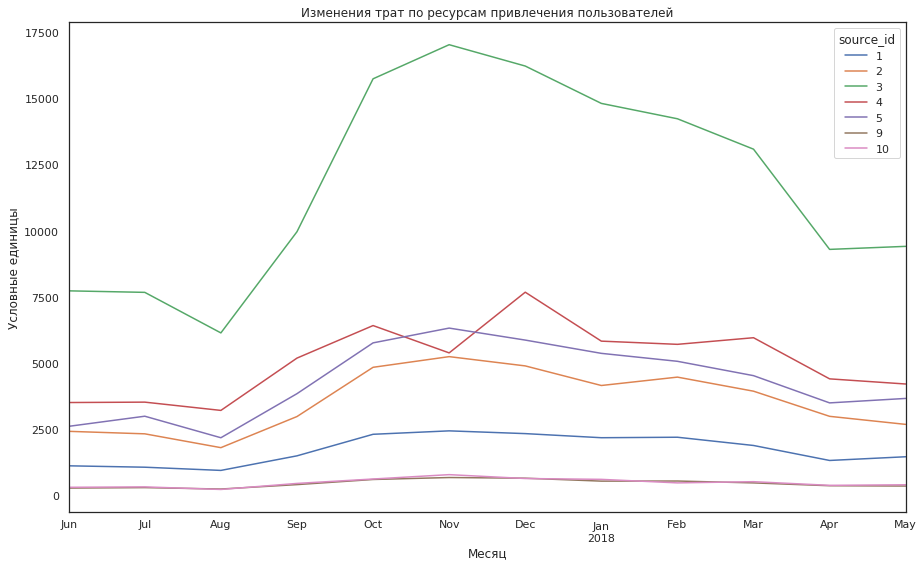

In [36]:
# Визуализируем изменения метрик во времени

costs['dt_month'] = costs['dt'].astype('datetime64[M]')
costs_pivot = costs.pivot_table(index='dt_month', columns='source_id', values='costs', aggfunc='sum')
costs_pivot.plot(figsize=(15,9));
plt.title('Изменения трат по ресурсам привлечения пользователей')
plt.xlabel('Месяц')
plt.ylabel('Условные единицы')


Видно, что на привлечение по третьему ресурсу было затрачено больше всего средств. Высяним позже насколько затраты окупают себя. 

In [37]:
#Рассчитаем средний CAC на одного покупателя для всего проекта
cac_pivot = costs.pivot_table(index='dt_month', values='costs', aggfunc='sum')
cac = cac_pivot.merge(initial_users_count, left_on='dt_month', right_on='first_order_month')
cac['cac'] = cac['costs']/cac['cohort_users']
display(cac)
print('Средний САС на одного покупателя для всего проекта: ', cac['cac'].mean())

,costs,first_order_month,cohort_users,cac
0,18015.00,2017-06-01,2023,8.905091
1,18240.59,2017-07-01,1923,9.485486
2,14790.54,2017-08-01,1370,10.796015
3,24368.91,2017-09-01,2581,9.441654
4,36322.88,2017-10-01,4340,8.369327
5,37907.88,2017-11-01,4081,9.288870
6,38315.35,2017-12-01,4383,8.741809
7,33518.52,2018-01-01,3373,9.937302
8,32723.03,2018-02-01,3651,8.962758
9,30415.27,2018-03-01,3533,8.608907


Средний САС на одного покупателя для всего проекта:  9.147357292482544


Text(0.5, 0, 'Месяц')

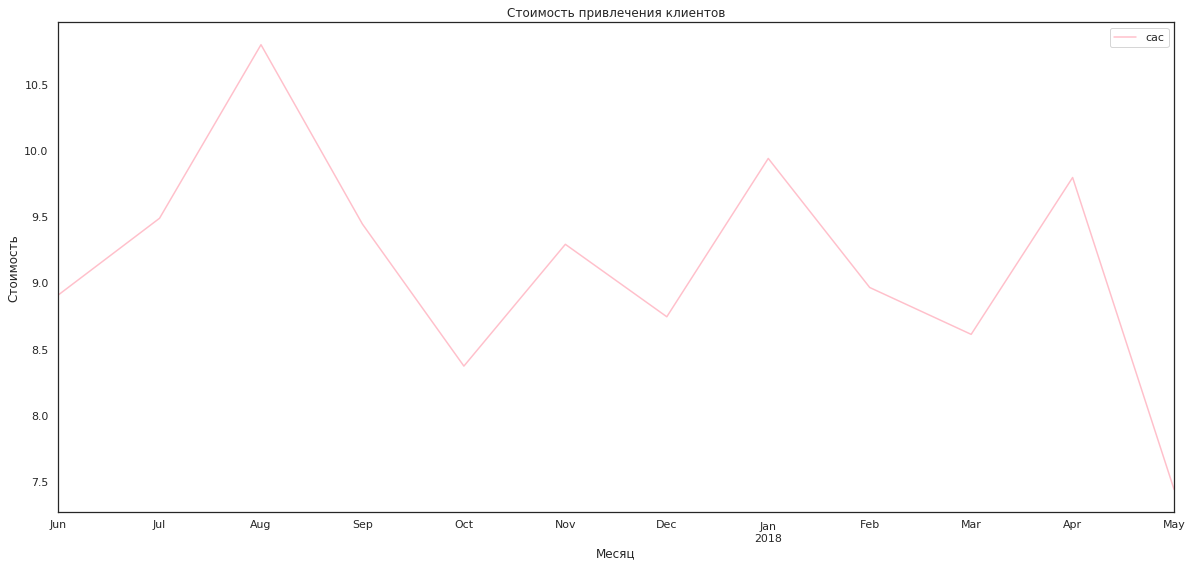

In [38]:
# Отразим изменения метрик на графиках
cac.pivot_table(index='first_order_month', values='cac').plot(figsize=(20,9), color='pink');
plt.title('Стоимость привлечения клиентов')
plt.ylabel('Стоимость')
plt.xlabel('Месяц')

Самая дорогостоящие привлечения клиентов пришлись на август. Предположительно из-за снижения фокуса внимания людей к мероприятиям из-за сезона (наступает лето или новогодние праздники, где люди больше гуляют или уезжают в отпуски, на дачи)

#### Рассчитаем ROMI(показатель рентабельности рекламных кампаний) по когортам в разрезе источников

In [39]:
#добавим столбец из какого ресурса пришёл пользователь в датасет покупок
sources = visits.sort_values(by = ['uid', 'start_ts']).groupby(['uid']).agg({'source_id': 'first'}).reset_index()
orders = orders.merge(sources, on='uid')
orders.head()

,buy_ts,revenue,uid,first_activity_date,first_order_month,order_month,lifetime,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0,3


Источник трафика 1


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.22,1.59,1.97,2.60,3.32,3.67,4.10,4.53,4.91,5.19,5.40,5.68
2017-07-01,1.09,1.25,2.05,2.27,2.41,2.54,2.61,2.70,2.83,2.98,3.12,NaN
2017-08-01,0.89,1.03,1.15,1.27,1.39,1.47,1.55,1.86,2.13,2.22,NaN,NaN
2017-09-01,0.91,1.18,1.27,1.41,1.41,1.43,1.44,1.49,1.57,NaN,NaN,NaN
2017-10-01,0.88,1.04,1.07,1.13,1.14,1.16,1.18,1.23,NaN,NaN,NaN,NaN
2017-11-01,0.98,1.06,1.18,1.30,1.32,1.34,1.35,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.65,0.69,0.73,0.77,0.77,0.78,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.63,0.64,0.65,0.76,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.58,0.71,0.72,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


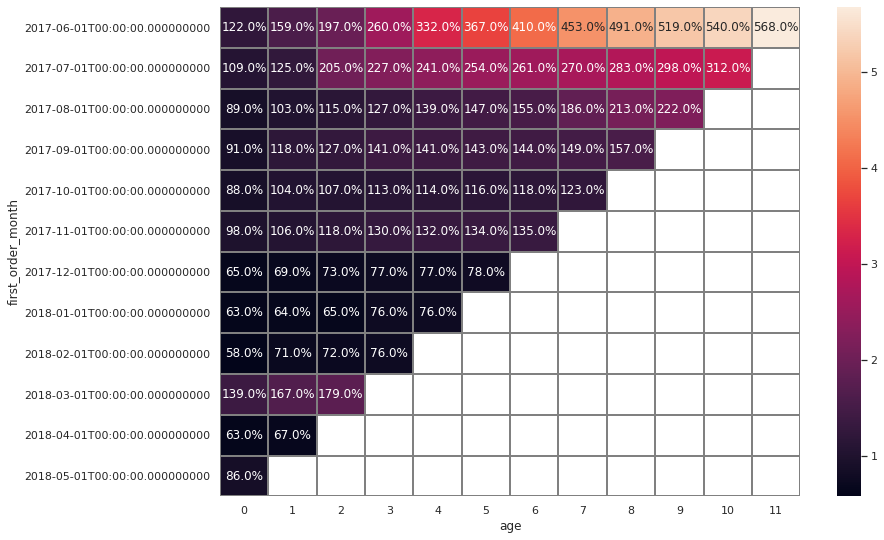

age
0      0.892500
1      1.943636
2      3.266000
3      4.453333
4      6.228750
5      8.397143
6     11.103333
7     13.980000
8     18.127500
9     23.596667
10    32.175000
11    44.180000
dtype: float64

Источник трафика 2


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.43,0.48,0.50,0.69,0.85,0.94,1.10,1.24,1.37,1.44,1.57,1.61
2017-07-01,0.75,0.82,0.83,0.85,0.89,0.91,0.94,0.95,0.96,0.98,1.01,NaN
2017-08-01,0.39,0.45,0.47,0.48,0.52,0.52,0.53,0.56,0.56,0.56,NaN,NaN
2017-09-01,0.61,1.21,1.39,1.46,1.56,1.63,1.88,1.94,1.98,NaN,NaN,NaN
2017-10-01,0.63,0.83,0.88,0.93,0.97,0.99,1.00,1.02,NaN,NaN,NaN,NaN
2017-11-01,0.53,0.60,0.63,0.69,0.72,0.73,0.74,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.69,0.81,1.53,2.39,2.63,2.88,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.31,0.38,0.50,0.52,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.35,0.40,0.42,0.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


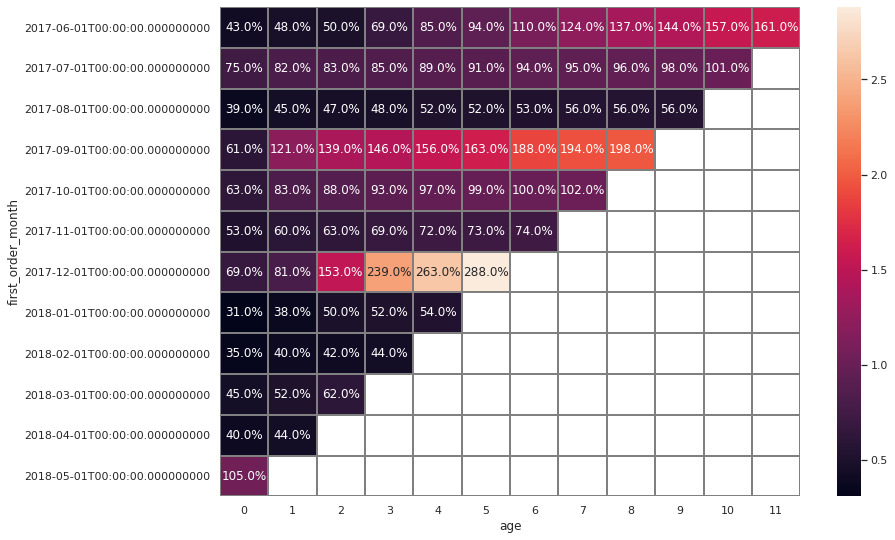

age
0      0.549167
1      1.134545
2      1.941000
3      2.918889
4      4.167500
5      5.670000
6      5.825000
7      7.204000
8      8.410000
9      7.653333
10    10.250000
11    12.220000
dtype: float64

Источник трафика 3


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.36,0.37,0.39,0.41,0.43,0.44,0.45,0.46,0.46,0.47,0.47,0.47
2017-07-01,0.41,0.42,0.43,0.46,0.46,0.47,0.47,0.48,0.48,0.49,0.49,NaN
2017-08-01,0.28,0.29,0.30,0.31,0.32,0.32,0.32,0.33,0.33,0.34,NaN,NaN
2017-09-01,0.44,0.46,0.48,0.49,0.51,0.51,0.52,0.53,0.54,NaN,NaN,NaN
2017-10-01,0.35,0.38,0.39,0.40,0.41,0.41,0.41,0.42,NaN,NaN,NaN,NaN
2017-11-01,0.32,0.33,0.34,0.35,0.35,0.35,0.36,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.34,0.35,0.36,0.37,0.38,0.38,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.28,0.29,0.30,0.31,0.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.29,0.31,0.32,0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


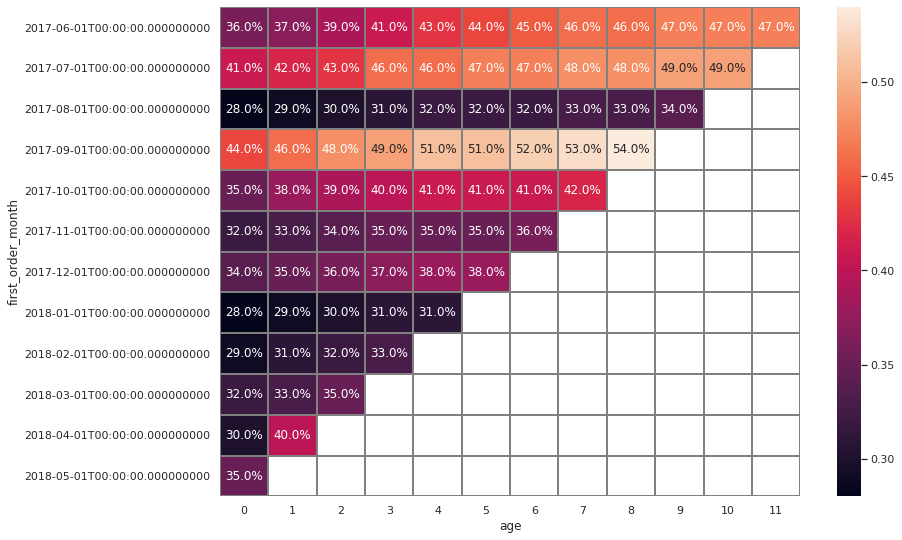

age
0     0.336667
1     0.692727
2     1.058000
3     1.445556
4     1.866250
5     2.331429
6     2.778333
7     3.298000
8     3.782500
9     3.983333
10    4.885000
11    5.180000
dtype: float64

Источник трафика 4


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.56,0.56,0.58,0.64,0.77,0.95,1.11,1.14,1.17,1.26,1.41,1.42
2017-07-01,0.81,0.82,0.83,0.86,0.86,0.87,0.89,0.89,0.91,0.92,0.92,NaN
2017-08-01,0.53,0.55,0.56,0.59,0.61,0.63,0.64,0.66,0.67,0.68,NaN,NaN
2017-09-01,0.54,0.60,0.63,0.66,0.67,0.70,0.84,0.87,0.88,NaN,NaN,NaN
2017-10-01,0.80,0.82,0.85,0.87,0.89,0.91,0.93,0.94,NaN,NaN,NaN,NaN
2017-11-01,1.12,1.26,1.29,1.38,1.42,1.43,1.48,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.75,0.76,0.78,0.80,0.80,0.82,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.67,0.69,0.71,0.72,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.79,0.81,0.82,0.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


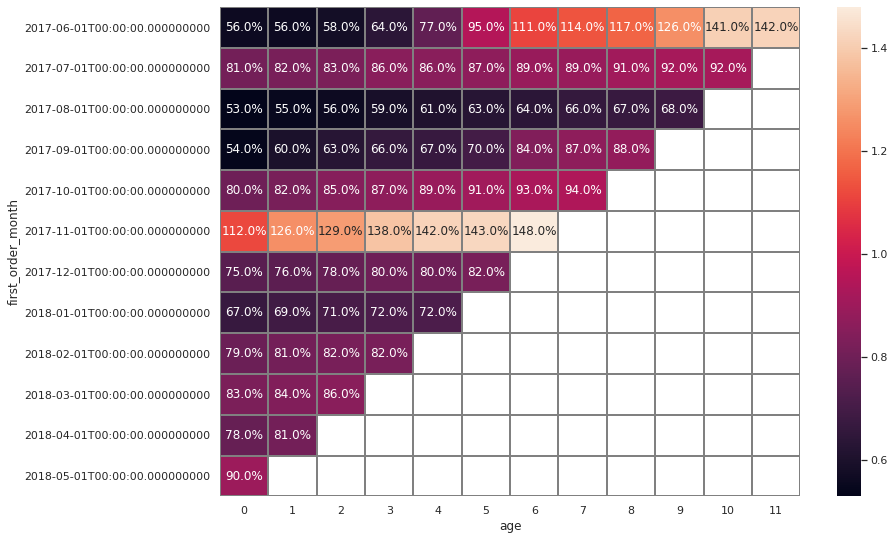

age
0      0.756667
1      1.518182
2      2.302000
3      3.092222
4      3.916250
5      4.875714
6      5.885000
7      6.086000
8      6.762500
9      7.840000
10     9.865000
11    11.570000
dtype: float64

Источник трафика 5


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.73,0.86,0.92,1.05,1.15,1.19,1.33,1.41,1.49,1.63,1.66,1.67
2017-07-01,0.75,0.79,0.86,0.88,0.89,0.91,0.91,0.92,0.94,0.95,0.96,NaN
2017-08-01,0.83,0.96,1.09,1.21,1.39,1.49,1.55,1.59,1.63,1.67,NaN,NaN
2017-09-01,0.95,0.98,1.03,3.50,3.62,3.93,3.97,4.00,4.00,NaN,NaN,NaN
2017-10-01,0.83,0.87,0.89,0.91,0.93,0.95,0.97,0.99,NaN,NaN,NaN,NaN
2017-11-01,0.50,0.52,0.53,0.54,0.55,0.56,0.57,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.66,0.68,0.69,0.69,0.70,0.70,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.51,0.57,0.62,0.62,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.58,0.59,0.60,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


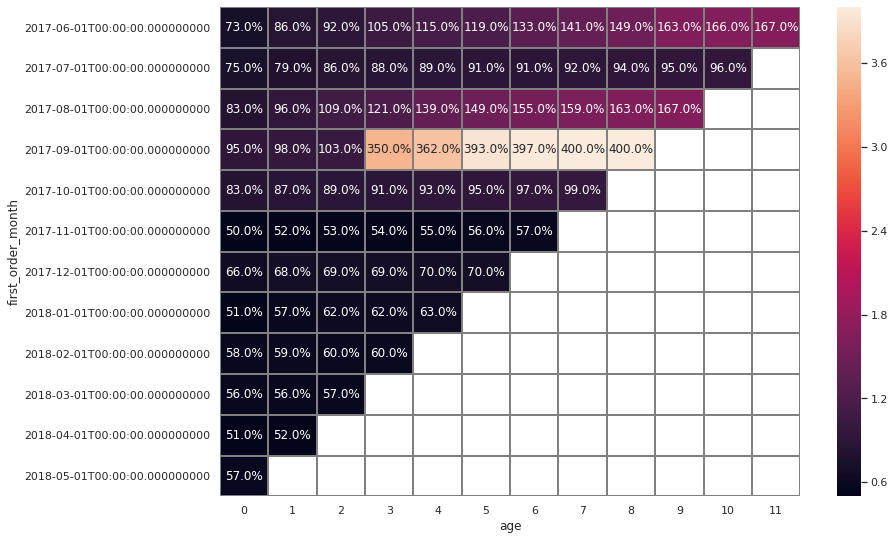

age
0      0.665000
1      1.391818
2      2.208000
3      3.376667
4      4.735000
5      6.380000
6      8.306667
7     10.996000
8     13.925000
9     11.323333
10    11.590000
11    15.090000
dtype: float64

Источник трафика 9


age,0,1,2,3,4,5,6,7,8,9,10
first_order_month,,,,,,,,,,,
2017-06-01,0.85,0.87,1.01,1.15,1.22,1.32,1.45,1.48,1.61,1.64,1.66
2017-07-01,0.77,0.80,0.90,0.99,1.05,1.06,1.11,1.12,1.19,1.20,1.21
2017-08-01,1.00,1.05,1.20,1.26,1.27,1.29,1.32,1.40,1.42,1.45,NaN
2017-09-01,0.90,1.11,1.25,1.41,1.54,1.57,1.69,1.83,2.02,NaN,NaN
2017-10-01,1.05,1.16,1.25,1.27,1.33,1.44,1.45,1.45,NaN,NaN,NaN
2017-11-01,0.79,0.82,0.86,0.92,0.95,0.96,0.96,NaN,NaN,NaN,NaN
2017-12-01,0.70,0.76,0.79,0.84,0.85,0.87,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.41,0.45,0.48,0.48,0.48,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.73,0.76,0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


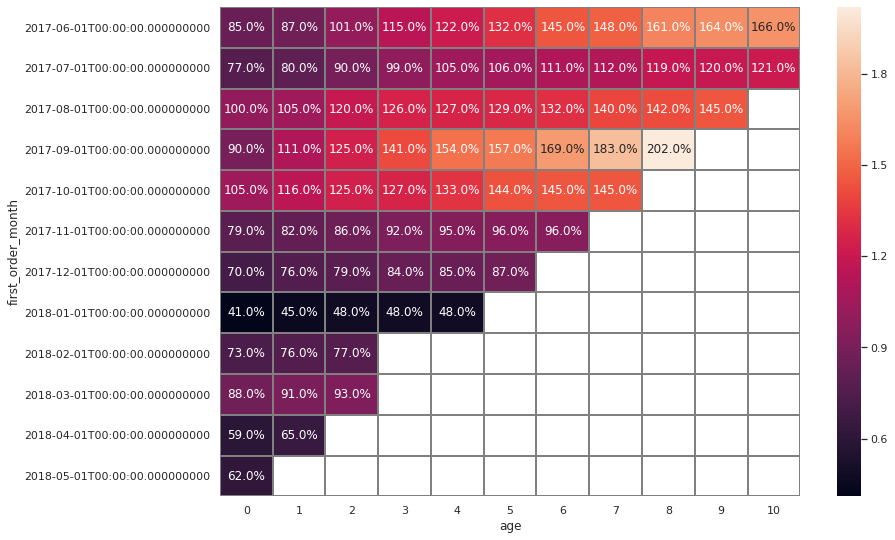

age
0      0.774167
1      1.637273
2      2.621000
3      3.693750
4      4.780000
5      6.350000
6      7.936667
7      9.728000
8     11.120000
9     11.816667
10    12.830000
dtype: float64

Источник трафика 10


age,0,1,2,3,4,5,6,7,8,9
first_order_month,,,,,,,,,,
2017-06-01,0.73,0.77,NaN,NaN,NaN,NaN,NaN,NaN,0.77,NaN
2017-07-01,0.54,0.54,NaN,0.56,NaN,NaN,NaN,NaN,0.56,NaN
2017-08-01,0.80,0.81,0.87,NaN,NaN,NaN,NaN,0.89,NaN,0.9
2017-09-01,0.42,0.43,0.44,0.48,0.49,NaN,NaN,0.49,0.49,NaN
2017-10-01,0.87,0.90,0.90,0.91,0.92,0.93,0.93,0.95,NaN,NaN
2017-11-01,0.75,0.76,0.76,0.79,0.80,0.81,0.82,NaN,NaN,NaN
2017-12-01,0.50,0.52,NaN,NaN,NaN,0.52,NaN,NaN,NaN,NaN
2018-01-01,0.46,0.47,0.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.63,0.66,0.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN


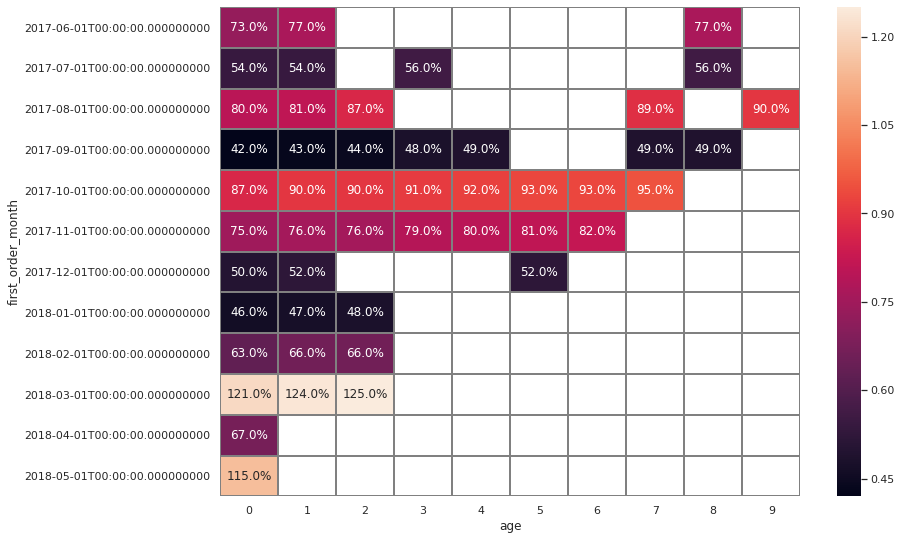

age
0    0.727500
1    1.401000
2    2.252857
3    2.512500
4    3.540000
5    3.880000
6    5.925000
7    4.476667
8    2.570000
9    4.270000
dtype: float64

In [40]:
#Рассчитаем ROMI по когортам в разрезе источников и отобразим на тепловой карте
#засунем рассчёты в функцию

list = [1,2,3,4,5,9,10]
for i in list:
    order_source = orders.query('source_id == @i')
    costs_source = costs.query('source_id == @i')

    cohorts_ltv = (order_source.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())
    cohorts_sizes = (order_source.groupby('first_order_month').agg({'uid':'nunique'}).reset_index())
    cohorts_sizes.columns=['first_order_month', 'n_buyers']
    report = cohorts_ltv.merge(cohorts_sizes, on='first_order_month')

    margin_rate = 1
    report['gp'] = report['revenue'] * margin_rate
    report['age'] = (
        report['order_month'] - report['first_order_month']
    ) / np.timedelta64(1, 'M')
    report['age'] = report['age'].round().astype('int')
    report['ltv'] =  report['gp'] / report['n_buyers']

    cac_pivot = costs_source.pivot_table(index='dt_month', values='costs', aggfunc='sum').reset_index()

    romi = report.merge(cac_pivot, left_on='first_order_month', right_on='dt_month')
    romi['cac'] = romi['costs']/romi['n_buyers']
    romi['romi'] = romi['ltv']/romi['cac']
    output = romi.pivot_table(
        index='first_order_month', columns='age', values='romi', aggfunc='mean'
    )
    output = output.cumsum(axis=1).round(2)
    print('Источник трафика', i)
    display(output)
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    sns.heatmap(output, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
    plt.show()
    display(output.cumsum(axis=1).mean(axis=0))
    

Эти данные достаточно оптимистичные.
Во всех источниках затраты окупаются уже на второй месяц.

А вот в третьем источнике, хоть в него и было вложено большее количество средств, окупился на третий месяц. От него надо не отказываться, но сократить бюджет и распределить его в другой более окупаемый ресурс, например, в первый.
В четвёртом источнике  статистика похожа на второй, также окупился на второй месяц.
Пятый источник уже радужнее.

И наконец десятый истоник трафика: хоть он и окупился на второй месяц, скорость окупания достаточно низкая 


## Сформулируем выводы и рекомендации

Определим источники трафика, на которые маркетологам стоит делать упор. Объясните свой выбор: на какие метрики вы ориентируетесь и почему:

* Положительные истоники трафика для быстрой окупаемости в порядке убывания:
 1. Первый источник трафика, который на последнем месяце окупился в 44 раза.
 2. Пятый истоник трафика с последним месяцем окупаемости в 15 раз.
 3. Девятый источник трафика по показателям окупаемости лучше второго источника, хоть и у обоих        последний месяц окупился в 12 раз.
 4. Второй источник трафика
 5. Самый ресурсозатратный третий источник трафика на предпоследнем месте по окупаемости. 
 6. Самый долгоокупаемый истоник трафика - 10. 
 Рекомендации: не резать траты на трафики совсем, потому что это может быть репутационная реклама,а  снизить расходы на маркетинг в третий источник и перераспределить ресурсы в первый и второй источники.
 
На графиках  активности пользователей можно увидеть, что с  августа 2017 по ноябрь сильный рост и после плавное снижение активности. 

В среднем посетители проводят на сайте по минуте. Примерно за такое время человек принимает решение.

Те люди, что привлеклись в августе и сентябре 2017 года, продолжали возвращаться гораздо чаще, чем в остальных когортах.
Самые перспективные когорты по пожизненной ценности клиентов за изучаемый срез оказались июньская и сентябрьская.
Можно взять модель привлечения клиентов из вышеперечисленных когорт за основу. Изучить характеристику среднего покупателя в этих когортах, способы привлечения и вкладывания средств в рекламу и на этой базе выстроить портрет клиента, который возвращается чаще за покупкой билетов и платит больше прибыли. 
Как в противовес можно посмотреть модели когорт, пожизненная ценность которых не принесла пользы, такие как августовская, ноябрьская, январская, февральская и мартовская; проанализировать каких людей привлекли в этот период (потому что их привлечение стоит денег, а покупок больше они не совершают) и снизить расходы в те источники трафика, из которых эти люди приходят. 

